# Project 1 - Statistical Inference (DIZON, TANG, TEE)
In this notebook, we will be exploring on the data from **MyAnimeList** which consists of anime-related data. We will be focusing on analyzing statistical-related inferences.

## numpy, pandas, and matplotlib
To start, we will be first importing the libraries that will be used to help us analyze the given data. The following libraries will be used:

1.   **Numpy**
2.   **Pandas**
3.  **Matplotlib**


In [93]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


## The Dataset
Next, we will be moving on to importing anime_list csv file. This will be the dataset that we will be working on. It contains over 23 variables (columns) and 18,162 observations (rows). Some of the variables will be ommitted from what we will be analyzing.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gavindizon/CSMODEL/main/Project%201%20-%20Statistical%20Inference/csv/anime_list.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mal_id      18162 non-null  int64  
 1   title       18162 non-null  object 
 2   synopsis    18162 non-null  object 
 3   background  18162 non-null  object 
 4   aired       18162 non-null  object 
 5   airing      18162 non-null  int64  
 6   duration    18162 non-null  object 
 7   episodes    18162 non-null  int64  
 8   type        18162 non-null  object 
 9   favorites   18162 non-null  int64  
 10  members     18162 non-null  int64  
 11  rank        18162 non-null  float64
 12  popularity  18162 non-null  int64  
 13  score       18162 non-null  float64
 14  scored_by   18162 non-null  int64  
 15  rating      18162 non-null  object 
 16  premiered   18162 non-null  object 
 17  genres      18095 non-null  object 
 18  related     18162 non-null  object 
 19  status      18162 non-nul

## Data Cleaning

Before analyzing the data, we will first clean the data. Here, we will remove the uneeded variables and variables with null values. Although, some of the variables that have null values but with the proper context (e.g. Not Applicable) will be represented with a uniform sentinel value (`-` for an object/ string and `-1` for a number) instead of removing the whole column.

In addition, since our analysis will be focusing on `TV` and `Movie` types we will be removing other types of Anime such as `OVA` and `ONA`.

In [4]:
df_cleaned = df.drop(['background', 'mal_id', 'synopsis', 'related'], 1)
#Convert raw data types to their necessary datatypes
df_cleaned['rank'] = df_cleaned['rank'].astype(int)
df_cleaned = df_cleaned.dropna(subset= ['genres'], how= 'any')

#Remove unnecessary part of dataset
df_cleaned = df_cleaned[(df_cleaned['type'] == 'TV') | (df_cleaned['type'] == 'Movie')]

df_cleaned = df_cleaned.reset_index()

### Checking for Possible Duplicates

Another thing that we could do is to check for possible duplicates, and we either merge these together or drop the others from the dataset depending on the context. In this dataset, there is one duplicate title found which is `Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e`. In the case of the duplicate, it can be seen below that one observation mostly consists of sentinel values. This just means that this observation is merely a duplicate thus we only need to remove it.

In [5]:
df_cleaned['title'].value_counts()

Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e    2
Pokemon Movie 02: Maboroshi no Pokemon Lugia Bakutan                                                   1
Ketsuekigata-kun! 2                                                                                    1
Kyoufu no Kyou-chan                                                                                    1
Guin Saga                                                                                              1
                                                                                                      ..
Black Fox                                                                                              1
Kyouryuu Daisensou Izenborg                                                                            1
Eikyuu Kazoku                                                                                          1
Mahou Shoujo Tokushusen Asuka                          

In [6]:
df_cleaned.loc[df_cleaned['title'] == 'Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e' ]

,index,title,aired,airing,duration,episodes,type,favorites,members,rank,popularity,score,scored_by,rating,premiered,genres,status,licensors,producers,studios
7470,16175,Maou Gakuin no Futekigousha: Shijou Saikyou no...,"Jul 4, 2020 to Sep 26, 2020",0,23 min per ep,13,TV,3066,437602,2188,343,7.34,245721,R - 17+ (violence & profanity),Summer 2020,"Action, Demons, Magic, Fantasy, School",Finished Airing,Aniplex of America,"Aniplex, Kadokawa",SILVER LINK.
8269,17966,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Not available,0,Unknown,-1,TV,100,18366,-1,3980,-1.00,-1,R - 17+ (violence & profanity),-,"Action, Demons, Magic, Fantasy, School",Not yet aired,-,Aniplex,SILVER LINK.


In [7]:
df_cleaned = df_cleaned.drop(df_cleaned.index[8269])
df_cleaned = df_cleaned.reset_index()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8342 entries, 0 to 8341
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     8342 non-null   int64  
 1   index       8342 non-null   int64  
 2   title       8342 non-null   object 
 3   aired       8342 non-null   object 
 4   airing      8342 non-null   int64  
 5   duration    8342 non-null   object 
 6   episodes    8342 non-null   int64  
 7   type        8342 non-null   object 
 8   favorites   8342 non-null   int64  
 9   members     8342 non-null   int64  
 10  rank        8342 non-null   int64  
 11  popularity  8342 non-null   int64  
 12  score       8342 non-null   float64
 13  scored_by   8342 non-null   int64  
 14  rating      8342 non-null   object 
 15  premiered   8342 non-null   object 
 16  genres      8342 non-null   object 
 17  status      8342 non-null   object 
 18  licensors   8342 non-null   object 
 19  producers   8342 non-null  

In [8]:
df_cleaned['rating'].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'None',
       'Rx - Hentai'], dtype=object)

## Exploratory Data Analysis

After the data was cleaned, we proceed now to analyzing it. Since the dataset was created for a recommendation system, we will be exploring possible correlations between the presented variables. Primarily, we will be focusing on three things which are the ff:
1. Correlation between the Rating and the Score 
2. -
3. -

# 1. Correlation between the Rating and the Score

To start, we will be exploring the correlation between the rating and the score. In the data given, there are 7 kinds of rating. 
- None
- G - All Ages
- PG - Children
- PG - Teens 13 or older
- R - 17+ (violence & profanity)
- R+ - Mild Nudity
- Rx - Hentai

## Further Data Preprocessing

We will be excluding the `None` type of rating in this analysis since we would be exploring only the rated types. Likewise, we will be grouping the observations based on their ratings.

In [42]:
#creates a dataframe that excludes the None Rating Type and Sentinel Value Rows from score
df_eda1 = df_cleaned.loc[(df_cleaned['rating'] != 'None') & (df_cleaned['score'] > -1.0)]

## Numerical Summaries

Here, we will be looking for the measure of central tendencies, dispersion, and possible correlation between the rating and the score.

In [85]:
df_eda1_num = df_eda1.groupby('rating').agg({'score': ["mean", "median", "std"]})
df_eda1_num

score                 
                                    mean median       std
rating                                                   
G - All Ages                    6.198567  6.230  0.857516
PG - Children                   6.566311  6.600  0.676875
PG-13 - Teens 13 or older       6.952306  7.020  0.827165
R - 17+ (violence & profanity)  7.237803  7.330  0.860957
R+ - Mild Nudity                6.522184  6.635  1.039909
Rx - Hentai                     5.725000  5.760  0.941483

To check for the possible correlation between the rating and the average score, we will be representing the ratings through a numerical value with `0` being the lowest which will be represented by the `G - All Ages` and `5` being the highest which will be represented by `Rx - Hentai`

In [86]:
df_eda1corr = (df_eda1_num.reset_index()).rename(columns={'': 'rating'}).reset_index().rename(columns={'': "num_value"})

df_eda1corr['index']['num_value'].corr(df_eda1corr['score']['mean'])

-0.2207063311724617

### Observation

It can be seen that there is a negatively very weak correlation between the rating and the scores. This means that there is a very weak relationship where in as the rating is intended for higher-aged audience the more the score will dip.

## Visualization

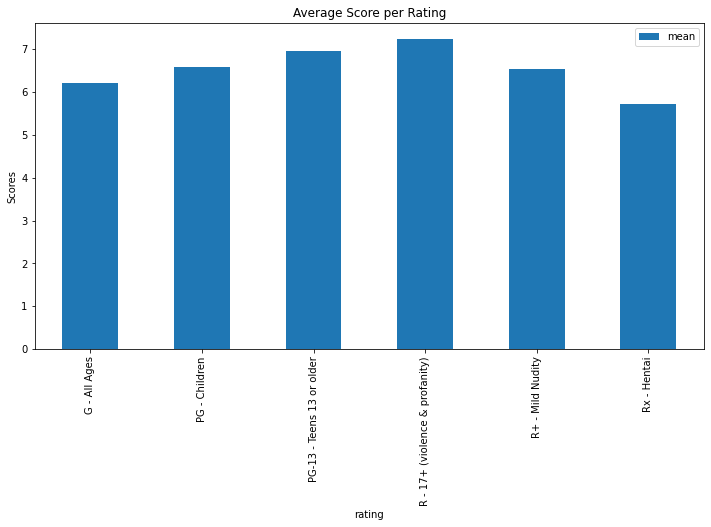

In [87]:
df_eda1_viz = df_eda1corr
df_eda1_viz.columns = df_eda1corr.columns.droplevel()

viz_eda1 = df_eda1_viz.plot.bar(figsize=(12,6), x='rating', y='mean')
viz_eda1.set_title("Average Score per Rating")
viz_eda1.set_ylabel('Scores')
plt.show()


### Observation
It can be seen that the rating with the highest average in terms of score is the `R-17+ (Violence & Profanity)` rating attaining `7.23`. It was then followed by `PG-13 - Teens 13 or older` and `PG-Children` attaining an average of `6.95` and `6.59` respectively. The lowest scored ratings are `Rx - Hentai`, `R+ - Mild Nudity`, and `G - All Ages` which got `5.73`, `6.20`, and `6.52` respectively.

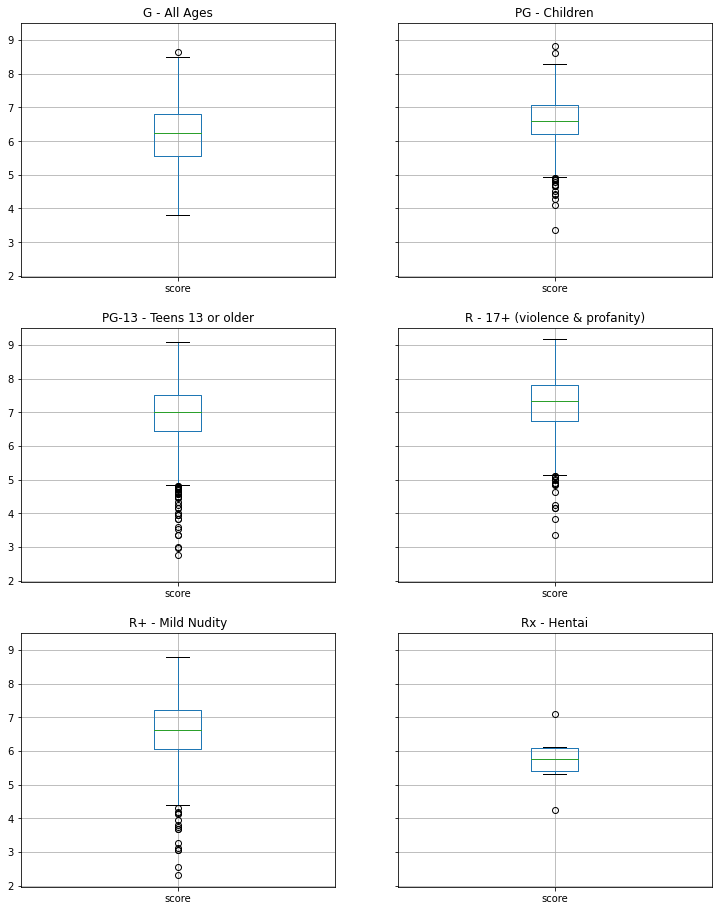

In [92]:
df_eda1.groupby('rating').boxplot(column="score",figsize=(12,16))
plt.show()


### Observation
The Box Plot shows the median of the `rating`. It could be seen that there are a lot of outliers for the `PG` to the `R+` rating.

## Research Questions

In terms of evaluating the rating and scores, there will be two questions:
1. answerable by performing statistical inference on means
2. answerable by performing statistical inference on categorical data

## Statistical Inferences

## Insight and Conclusion

### Genre and Score
To start, we will be exploring on scores and genres. With that, we first ask the question, on average, **what genre has the highest score?** We want to answer this question since we want to know if there is a trend with regards to what genre is the highest rated. To answer that, we will be adding further preprocessing since not all of the observations in the dataset are scored. As such, there is a sentinel value `-1` which is reserved for unscored observations. In addition, we will be preprocess the genres first since it is in the format of a string and it would be difficult to analyze each genres.

In [163]:
df_GAndS_res1 = df_cleaned[df_cleaned['score'] != -1.0]
df_GAndS_res1 = df_GAndS_res1[['title','score', 'scored_by', 'genres']]

df_GAndS_res1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6003 entries, 0 to 8264
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      6003 non-null   object 
 1   score      6003 non-null   float64
 2   scored_by  6003 non-null   int64  
 3   genres     6003 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 234.5+ KB


### Observation

As we can see, the number of observations have been trimmed down to `6003`. Now we move on to preparing, the genres.

In [164]:
#separate genres with delimiter: ,
df_GAndS_res1 = (df_GAndS_res1.set_index(['title','score', 'scored_by'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index()) 

#remove whitespaces
df_GAndS_res1['genres'] = df_GAndS_res1['genres'].str.strip()

#add new column
df_GAndS_res1['score_weight'] = df_GAndS_res1['score'] * df_GAndS_res1['scored_by']    
df_GAndS_res1

,title,score,scored_by,genres,score_weight
0,Cowboy Bebop,8.77,661519,Action,5801521.63
1,Cowboy Bebop,8.77,661519,Adventure,5801521.63
2,Cowboy Bebop,8.77,661519,Comedy,5801521.63
3,Cowboy Bebop,8.77,661519,Drama,5801521.63
4,Cowboy Bebop,8.77,661519,Sci-Fi,5801521.63
...,...,...,...,...,...
21794,Blue Reflection Ray,5.49,2362,Magic,12967.38
21795,Blue Reflection Ray,5.49,2362,School,12967.38
21796,Mazica Party,5.48,131,Game,717.88
21797,Mazica Party,5.48,131,Magic,717.88


In [165]:
df_GAndS_res1Grouped = df_GAndS_res1.groupby('genres').agg({'scored_by': 'sum', 'score_weight': 'sum'})
df_GAndS_res1Grouped['average'] = round(df_GAndS_res1Grouped['score_weight'] / df_GAndS_res1Grouped['scored_by'], 3)
df_GAndS_res1Grouped = df_GAndS_res1Grouped.sort_values(by='average', ascending=False).reset_index()
df_GAndS_res1Grouped.head(10)

,genres,scored_by,score_weight,average
0,Military,19676661,1.603970e+08,8.152
1,Thriller,15273987,1.241969e+08,8.131
2,Police,5722187,4.650316e+07,8.127
3,Samurai,3805315,3.089344e+07,8.118
4,Historical,13048577,1.049839e+08,8.046
5,Cars,747708,6.000694e+06,8.025
6,Drama,94938063,7.573744e+08,7.978
7,Parody,9120113,7.273190e+07,7.975
8,Sports,11523627,9.159062e+07,7.948
9,Super Power,38455080,3.055841e+08,7.947


In [166]:
df_GAndS_res1Grouped.tail(10)

,genres,scored_by,score_weight,average
32,Martial Arts,9118441,6.874061e+07,7.539
33,Shounen Ai,1525285,1.149074e+07,7.534
34,Game,14164154,1.066202e+08,7.527
35,Horror,15906693,1.188810e+08,7.474
36,Ecchi,30043421,2.151743e+08,7.162
37,Kids,3297099,2.342578e+07,7.105
38,Harem,24665478,1.739695e+08,7.053
39,Yaoi,8728,6.147015e+04,7.043
40,Shoujo Ai,1931813,1.349317e+07,6.985
41,Hentai,16252,1.068373e+05,6.574


### Explanation

Since observation (or animes) have multiple `genres`, we would first need to duplicate each observation per genre. After this, we compute for the weighted score which is done by multiplying the initial `score` average to the number of people who scored the observation (`scored_by`). This is done so that after aggregating the observations by their `genres`, we could compute for the weighted average for each `genre`.

### Observation

It can be seen that the `Military` genre is the highest rated genre among the 41 unique genres. It garnered the score of **8.152**. It was then followed by  `Thriller` and `Police` which got an average of **8.131** and **8.127** respectively. On the other hand, the lowest rated genre is `Hentai` which only got an average of **6.574**. It was followed by `Shoujo Ai` and `Yaoi` obtaining **6.985** and **7.043** respectively. 

### Visualization

To get a better look at the data, we now plot the top and bottom 10 into bar graphs.

(7.8, 8.2)

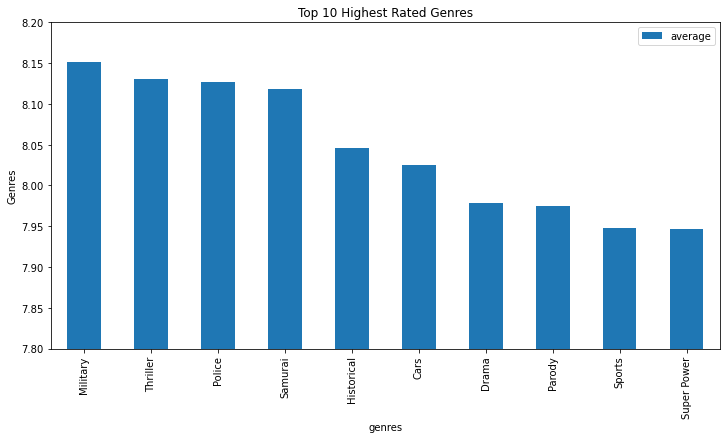

In [198]:
viz_GAndS1 = df_GAndS_res1Grouped.head(10).plot.bar(figsize=(12,6), x='genres', y='average')
viz_GAndS1.set_title("Top 10 Highest Rated Genres")
viz_GAndS1.set_ylabel('Genres')
plt.ylim([7.8, 8.2])


(6.4, 7.8)

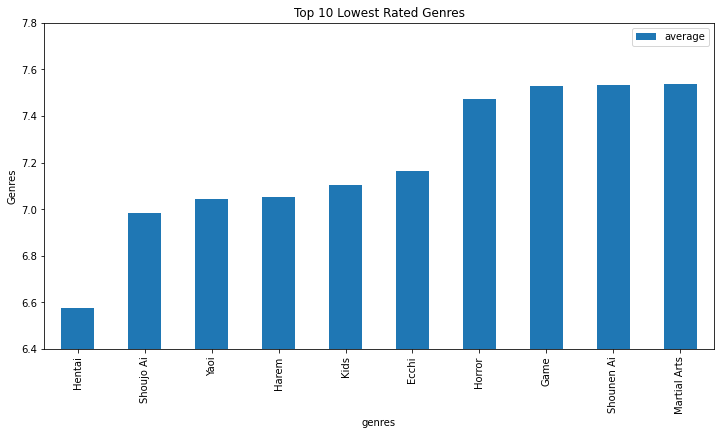

In [196]:
viz_GAndS2 = df_GAndS_res1Grouped.tail(10).sort_values(by='average', ascending=True).plot.bar(figsize=(12,6), x='genres', y='average')
viz_GAndS2.set_title("Top 10 Lowest Rated Genres")
viz_GAndS2.set_ylabel('Genres')
plt.ylim([6.4, 7.8])